In [1]:
import itertools
from basics import *
from plotting import *
from plotting import savefig
from ase.io import read
import seaborn as sns
from scipy import stats

plt.style.use("paper")

In [8]:
root_dir = "../data/03-mace-mcmc"

In [11]:
dset_path = os.path.join(root_dir, "mcmc-sampled.xyz")

dset = read(dset_path, index=":")

full = []
for i, at in enumerate(dset):
    full.append({
        "index": i,
        "crystal_id": at.info["crystal_id"],
        "nads": (at.numbers == 6).sum(),
        "n_atoms": len(at),
        "true": at.info["energy"],
        "pred": at.info["MACE_energy"],
        "facet": at.info["facet"]
    })

full = pd.DataFrame(full)

full["npred"] = full["pred"] / full["nads"]
full["ntrue"] = full["true"] / full["nads"]

In [12]:
full_metrics = []

for facet, grp in full.groupby("facet"):
    err = grp["npred"] - grp["ntrue"]
    _rmse = np.sqrt((err ** 2).mean())
    full_metrics.append({"facet": facet, "rmse": _rmse})

full_metrics = pd.DataFrame(full_metrics)

In [13]:
full_metrics

,facet,rmse
0,100,0.095661
1,111,0.090632
2,211,0.092533
3,331,0.096975
4,410,0.084403
5,711,0.102120


In [31]:
err = full["npred"] - full["ntrue"]
rmse = np.sqrt((err ** 2).mean())

In [32]:
rmse

0.09391538472019641

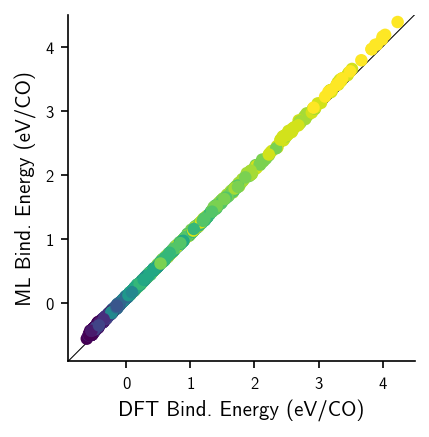

In [30]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.scatter(
    full["ntrue"], full["npred"],
    c=full["nads"],
    linewidths=0.0,
)

lims = [-0.9, 4.5]
ax.plot(lims, lims, "k-", linewidth=0.5, zorder=-1)
ax.set_aspect("equal")
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel("DFT Bind. Energy (eV/CO)")
ax.set_ylabel("ML Bind. Energy (eV/CO)")

savefig(fig, "03-mcmc-parity.pdf")
plt.show()